# Team 6
- [Video Presentation link](https://youtu.be/bljkNncvDOg)
## Team Member:
- Eshan Mehrota (emehrota)
- Angel Lee (angellee)


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/"

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
path = "Spring'22/95885 A - DSBD/DSBD Project 2 - ML/"
%cd "/content/drive/My Drive/Spring'22/95885 A - DSBD/DSBD Project 2 - ML/"

/content/drive/My Drive/Spring'22/95885 A - DSBD/DSBD Project 2 - ML


Sampling code referenced from [here](https://www.kaggle.com/code/paweljankiewicz/hm-create-dataset-samples)
Only to be run once!

# Data Setup



```
# This is formatted as code
# Sampling code
transactions = pd.read_csv(path+"transactions_train.csv", dtype={"article_id": "str"})
customers = pd.read_csv(path+"customers.csv")
articles = pd.read_csv(path+"articles.csv", dtype={"article_id": "str"})
for sample_repr, sample in [("01", 0.001), ("1", 0.01), ("5", 0.05)]:
    print(sample)
    customers_sample = customers.sample(int(customers.shape[0]*sample), replace=False)
    customers_sample_ids = set(customers_sample["customer_id"])
    transactions_sample = transactions[transactions["customer_id"].isin(customers_sample_ids)]
    articles_sample_ids = set(transactions_sample["article_id"])
    articles_sample = articles[articles["article_id"].isin(articles_sample_ids)]
    customers_sample.to_csv(path + f"customers_sample{sample_repr}.csv.gz", index=False)
    transactions_sample.to_csv(path + f"transactions_train_sample{sample_repr}.csv.gz", index=False)
    articles_sample.to_csv(path + f"articles_train_sample{sample_repr}.csv.gz", index=False)
```



In [ ]:
# Read in sampled data from the larger dataset
customers = pd.read_csv("customers.csv")
articles = pd.read_csv("articles.csv", dtype={"article_id": "str"})
# transactions = pd.read_csv('transactions_train.csv',dtype={'article_id': str})
# transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
cust01_df = pd.read_csv("customers_sample1.csv.gz")
cust01_df.name = 'Customer_metadata'    
art01_df = pd.read_csv("articles_train_sample1.csv.gz")
art01_df.name = 'Articles_metadata'
trans01_df = pd.read_csv("transactions_train_sample1.csv.gz")
trans01_df.name = 'Transactions_Train_data'
# samplesub_df = pd.read_csv("sample_submission.csv")

In [ ]:
pd.options.display.max_columns = 500  

In [ ]:
#Combining the three tables into one dataframe
join01_df = pd.merge(art01_df, trans01_df, on = 'article_id')
combo01_df = pd.merge(cust01_df, join01_df, on = 'customer_id')
combo01_df.name='Combined 1% Sampled Training Data'
# table_desc(combo1_df)   

In [ ]:
combo01_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316748 entries, 0 to 316747
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_id                   316748 non-null  object 
 1   FN                            135131 non-null  float64
 2   Active                        133049 non-null  float64
 3   club_member_status            316452 non-null  object 
 4   fashion_news_frequency        315235 non-null  object 
 5   age                           315517 non-null  float64
 6   postal_code                   316748 non-null  object 
 7   article_id                    316748 non-null  int64  
 8   product_code                  316748 non-null  int64  
 9   prod_name                     316748 non-null  object 
 10  product_type_no               316748 non-null  int64  
 11  product_type_name             316748 non-null  object 
 12  product_group_name            316748 non-nul

In [ ]:
combo01_df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'article_id',
       'product_code', 'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc', 't_dat',
       'price', 'sales_channel_id'],
      dtype='object')

# Feature Exploration & Engineering

In [ ]:
columns = ["product_group_name","colour_group_name","perceived_colour_master_name","department_name","index_group_name","index_name","section_name","garment_group_name"]
for col in columns:
    print(combo01_df[col].value_counts())  

Garment Upper body       125017
Garment Lower body        71527
Garment Full body         34515
Swimwear                  25760
Underwear                 25629
Accessories               15738
Shoes                      7527
Socks & Tights             6692
Nightwear                  3292
Unknown                     893
Bags                         72
Items                        53
Cosmetic                     16
Furniture                     9
Stationery                    3
Underwear/nightwear           3
Garment and Shoe care         2
Name: product_group_name, dtype: int64
Black              108691
White               33857
Dark Blue           22027
Light Beige         12664
Blue                11023
Beige                9163
Light Blue           9144
Light Pink           8562
Grey                 8440
Off White            8251
Red                  7617
Greenish Khaki       7425
Dark Red             7277
Dark Green           7219
Dark Grey            7179
Pink                 4976
Y

In [ ]:
interest_art_columns = ["product_group_name","perceived_colour_master_name","index_group_name","garment_group_name"]
interest_cols = ["customer_id","age","sales_channel_id"] + interest_art_columns
interest_cols

['customer_id',
 'age',
 'sales_channel_id',
 'product_group_name',
 'perceived_colour_master_name',
 'index_group_name',
 'garment_group_name']

In [ ]:
customers_char = combo01_df[interest_cols]
customers_char.head(2)

,customer_id,age,sales_channel_id,product_group_name,perceived_colour_master_name,index_group_name,garment_group_name
0,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,2,Garment Upper body,White,Ladieswear,Jersey Fancy
1,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,2,Garment Upper body,Yellow,Ladieswear,Blouses


In [ ]:
customers_char.nunique()

customer_id                     13633
age                                69
sales_channel_id                    2
product_group_name                 17
perceived_colour_master_name       20
index_group_name                    5
garment_group_name                 21
dtype: int64

In [ ]:
# Mapping Online and In Store
sales_channel_dict = {1:'Store',2:'Online'}
customers_char['sales_channel_name'] = customers_char['sales_channel_id'].map(sales_channel_dict)
customers_char.drop(columns=['sales_channel_id'],inplace=True)   
customers_char.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,customer_id,age,product_group_name,perceived_colour_master_name,index_group_name,garment_group_name,sales_channel_name
0,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,Garment Upper body,White,Ladieswear,Jersey Fancy,Online
1,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,Garment Upper body,Yellow,Ladieswear,Blouses,Online


## Data Cleaning

In [ ]:
customers_char.drop(customers_char[customers_char["product_group_name"]=="Unknown"].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
customers_char[customers_char["product_group_name"]=="Unknown"]

,customer_id,age,product_group_name,perceived_colour_master_name,index_group_name,garment_group_name,sales_channel_name


In [ ]:
customers_char.shape

(315855, 7)

In [ ]:
customers_char.drop(customers_char[customers_char["perceived_colour_master_name"]=="undefined"].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
customers_char.shape

(315633, 7)

In [ ]:
for col in customers_char.columns[2:]:
    customers_char.drop(customers_char[customers_char[col]=="Unknown"].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
customers_char.shape

(309287, 7)

In [ ]:
customers_char.head(2)

,customer_id,age,product_group_name,perceived_colour_master_name,index_group_name,garment_group_name,sales_channel_name
0,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,Garment Upper body,White,Ladieswear,Jersey Fancy,Online
1,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,Garment Upper body,Yellow,Ladieswear,Blouses,Online


## Feature Vectorization

In [ ]:
def vectorize_df(inputdf, column):
    df_col = pd.DataFrame(customers_char.groupby('customer_id')[column].value_counts())
    df_col.rename(columns={column:"counts"},inplace=True)
    df_col.reset_index(inplace=True)
    df_col_pivoted = pd.pivot_table(data=df_col,index='customer_id',columns=column,values='counts',aggfunc=np.sum,fill_value=0)
    
    return pd.merge(inputdf, df_col_pivoted, on = 'customer_id')

In [ ]:
inputdf = customers_char.iloc[:,:2].drop_duplicates()
to_vector_cols = ["sales_channel_name","index_group_name","perceived_colour_master_name","product_group_name","garment_group_name"]
for col in to_vector_cols:
    df_vectorized = vectorize_df(inputdf, col)
    inputdf = df_vectorized

In [ ]:
df_vectorized

,customer_id,age,Online,Store,Baby/Children,Divided,Ladieswear,Menswear,Sport,Beige,Black,Blue,Bluish Green,Brown,Green,Grey,Khaki green,Lilac Purple,Metal,Mole,Orange,Pink,Red,Turquoise,White,Yellow,Yellowish Green,Accessories_x,Bags,Cosmetic,Garment Full body,Garment Lower body,Garment Upper body,Items,Nightwear,Shoes_x,Socks & Tights,Swimwear_x,Underwear,Underwear/nightwear,Accessories_y,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,Shirts,Shoes_y,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear_y,Trousers,Trousers Denim,"Under-, Nightwear",Woven/Jersey/Knitted mix Baby
0,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,5,0,0,0,5,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,bf2ce07a1756eb835d6ecfca1c53a6a8038b743866efbd...,23.0,8,10,0,3,8,7,0,3,6,1,0,2,0,0,0,0,1,0,2,0,0,0,2,1,0,0,0,0,0,1,13,0,0,1,0,3,0,0,0,3,0,0,0,3,2,2,1,2,1,0,0,0,0,3,1,0,0,0
2,9d47b347320e10cdba556fc22b6b5e3d08b3da2d42ba79...,24.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,9e0f00e972a5c2cb9d6693f15b14b5f5c9fdf5459aede1...,34.0,17,15,0,0,22,0,10,0,15,5,0,0,0,1,1,0,0,0,0,4,2,1,3,0,0,2,0,0,0,4,7,0,2,0,3,2,12,0,2,0,0,0,0,0,10,0,0,0,0,0,0,3,0,2,0,0,15,0
4,858fad4653e9e406aa7f1d23cdea023c9b1889bd8feb89...,53.0,191,8,5,21,159,0,14,11,81,14,0,3,15,12,3,8,5,6,4,3,4,4,23,3,0,29,0,0,23,30,45,0,1,8,3,34,26,0,30,19,1,23,3,1,20,3,6,0,8,0,0,3,1,34,21,2,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,9b83f8d04664c54b30b3099909c388a990317ab12b5ca2...,43.0,0,5,0,0,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0
13569,5b7c093e10aad6ef556044628984a214e2bbaafff42565...,51.0,2,7,0,0,8,1,0,0,6,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,3,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,3,0,1,2,0,0
13570,5e6775ba11e46033321bae8f60f4a488925c9bbd0b2f3e...,59.0,2,2,0,0,4,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13571,6aaad27d06d91585563ee28840b83694d9448ae80fad06...,20.0,0,32,0,13,18,0,1,1,8,6,0,0,1,0,1,0,0,0,0,0,2,0,12,1,0,0,0,0,2,8,18,0,0,0,0,2,2,0,0,4,0,2,0,5,5,5,0,0,0,3,1,0,0,2,3,0,2,0


In [ ]:
## Saving to csv for reuse
df_vectorized.to_csv('df_vectorized_01.csv')

In [ ]:
# path = path + 'Data/'
df_vectorized_1 = pd.read_csv('df_vectorized_1.csv')
df_vectorized_1.head(2)

,Unnamed: 0,customer_id,age,Online,Store,Baby/Children,Divided,Ladieswear,Menswear,Sport,...,Shoes_y,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear_y,Trousers,Trousers Denim,"Under-, Nightwear",Woven/Jersey/Knitted mix Baby
0,0,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,5,0,0,0,5,0,0,...,0,0,0,0,0,0,2,0,0,0
1,1,bf2ce07a1756eb835d6ecfca1c53a6a8038b743866efbd...,23.0,8,10,0,3,8,7,0,...,1,0,0,0,0,3,1,0,0,0


In [ ]:
df_vectorized_1.describe()

,Unnamed: 0,age,Online,Store,Baby/Children,Divided,Ladieswear,Menswear,Sport,Beige,...,Shoes_y,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear_y,Trousers,Trousers Denim,"Under-, Nightwear",Woven/Jersey/Knitted mix Baby
count,13573.000000,13419.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,...,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000
mean,6786.000000,36.577614,15.912989,6.873941,0.911810,5.117365,14.633979,1.308259,0.815516,1.495985,...,0.543137,0.527371,0.465630,0.527960,0.156929,1.852428,2.215649,0.948943,2.122817,0.043321
std,3918.331937,14.326063,32.102717,13.589757,3.999774,10.273557,25.226591,4.364813,2.411903,3.408514,...,1.840733,1.641837,1.491286,1.766227,0.672375,4.759973,4.941716,2.636009,4.629130,0.506844
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3393.000000,24.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6786.000000,32.000000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10179.000000,49.000000,16.000000,8.000000,0.000000,6.000000,17.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
max,13572.000000,88.000000,558.000000,321.000000,131.000000,244.000000,443.000000,121.000000,36.000000,57.000000,...,46.000000,39.000000,32.000000,85.000000,18.000000,82.000000,119.000000,50.000000,93.000000,37.000000


# Data Imputation for Age using MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# MICE imputation for imputing missing values
X = df_vectorized_1.drop(columns=['Unnamed: 0', 'customer_id'])
imp = IterativeImputer(max_iter=10, random_state=0)
X = imp.fit_transform(X)

from sklearn.cluster import KMeans
## Initiate and fit a K-means model to projected data
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
clusters = kmeans.labels_
kmeans.cluster_centers_.shape

(5, 58)

## K-means Clustering not too interpretable

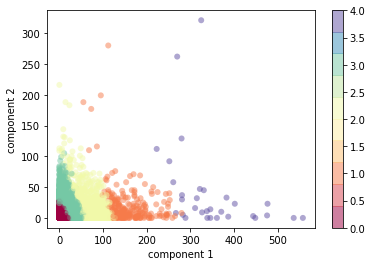

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1],
            c=kmeans.labels_, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# LDA based on Article Features as words

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np 
number_topics = 5
lda = LDA(n_components=number_topics,max_iter=10,  n_jobs=-1)
lda.fit(X)

LatentDirichletAllocation(n_components=5, n_jobs=-1)



```
column_dict = {}
index = 2
for col in to_vector_cols:
    num_unique = customers_char[col].nunique()
    for k in df_vectorized.columns[index:(index+num_unique)].to_list():
        column_dict[k] = col
    index = index + customers_char[col].nunique()
```



In [ ]:
characteristic_mapping_dict = {'Accessories_x': 'product_group_name',
 'Accessories_y': 'garment_group_name',
 'Baby/Children': 'index_group_name',
 'Bags': 'product_group_name',
 'Beige': 'perceived_colour_master_name',
 'Black': 'perceived_colour_master_name',
 'Blouses': 'garment_group_name',
 'Blue': 'perceived_colour_master_name',
 'Brown': 'perceived_colour_master_name',
 'Cosmetic': 'product_group_name',
 'Divided': 'index_group_name',
 'Dressed': 'garment_group_name',
 'Dresses Ladies': 'garment_group_name',
 'Dresses/Skirts girls': 'garment_group_name',
 'Garment Full body': 'product_group_name',
 'Garment Lower body': 'product_group_name',
 'Garment Upper body': 'product_group_name',
 'Green': 'perceived_colour_master_name',
 'Grey': 'perceived_colour_master_name',
 'Items': 'product_group_name',
 'Jersey Basic': 'garment_group_name',
 'Jersey Fancy': 'garment_group_name',
 'Khaki green': 'perceived_colour_master_name',
 'Knitwear': 'garment_group_name',
 'Ladieswear': 'index_group_name',
 'Lilac Purple': 'perceived_colour_master_name',
 'Menswear': 'index_group_name',
 'Metal': 'perceived_colour_master_name',
 'Mole': 'perceived_colour_master_name',
 'Nightwear': 'product_group_name',
 'Online': 'sales_channel_name',
 'Orange': 'perceived_colour_master_name',
 'Outdoor': 'garment_group_name',
 'Pink': 'perceived_colour_master_name',
 'Red': 'perceived_colour_master_name',
 'Shirts': 'garment_group_name',
 'Shoes_x': 'product_group_name',
 'Shoes_y': 'garment_group_name',
 'Shorts': 'garment_group_name',
 'Skirts': 'garment_group_name',
 'Socks & Tights': 'product_group_name',
 'Socks and Tights': 'garment_group_name',
 'Special Offers': 'garment_group_name',
 'Sport': 'index_group_name',
 'Store': 'sales_channel_name',
 'Swimwear_x': 'product_group_name',
 'Swimwear_y': 'garment_group_name',
 'Trousers': 'garment_group_name',
 'Trousers Denim': 'garment_group_name',
 'Turquoise': 'perceived_colour_master_name',
 'Under-, Nightwear': 'garment_group_name',
 'Underwear': 'product_group_name',
 'White': 'perceived_colour_master_name',
 'Woven/Jersey/Knitted mix Baby': 'garment_group_name',
 'Yellow': 'perceived_colour_master_name',
 'Yellowish Green': 'perceived_colour_master_name',
 'Underwear/nightwear': 'product_group_name'}

## Loading in most recent weeks transactions and top articles

In [ ]:
articles = pd.read_csv('articles.csv',dtype={'article_id': str} )
to_vector_cols = ['article_id', 'prod_name', "index_group_name","perceived_colour_master_name","product_group_name","garment_group_name"]
# articles[to_vector_cols].head(2)

transactions = pd.read_csv(
   'transactions_train.csv',
    dtype={'article_id': str} 
)
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
# transactions.head(2)

train_start_time = '2020-09-01'
transactions_train = transactions[transactions['t_dat'] >= pd.to_datetime(train_start_time)].copy()

count_articles_trasaction = transactions_train.groupby('article_id').count().reset_index()[['article_id','t_dat']]
count_articles_trasaction = count_articles_trasaction.rename(columns={"t_dat":"count"})
top_articles_sales = pd.merge(count_articles_trasaction,articles[to_vector_cols])
top_articles_sales

,article_id,count,prod_name,index_group_name,perceived_colour_master_name,product_group_name,garment_group_name
0,0108775044,10,Strap top,Ladieswear,White,Garment Upper body,Jersey Basic
1,0110065011,1,OP T-shirt (Idro),Ladieswear,Beige,Underwear,"Under-, Nightwear"
2,0111565001,95,20 den 1p Stockings,Ladieswear,Black,Socks & Tights,Socks and Tights
3,0111586001,250,Shape Up 30 den 1p Tights,Ladieswear,Black,Garment Lower body,Socks and Tights
4,0111593001,257,Support 40 den 1p Tights,Ladieswear,Black,Socks & Tights,Socks and Tights
...,...,...,...,...,...,...,...
26247,0952267001,39,Heavy plain overknee tights 1p,Ladieswear,Black,Socks & Tights,Socks and Tights
26248,0952938001,9,Elton top,Ladieswear,Mole,Garment Upper body,Jersey Fancy
26249,0953450001,17,5pk regular Placement1,Menswear,Black,Socks & Tights,Socks and Tights
26250,0953763001,35,SPORT Malaga tank,Ladieswear,Black,Garment Upper body,Jersey Fancy


# Mapping Product Characteristic Distributions to Topics & Finding Top 10 char per Topic + Top 12 Product per Topic char

In [ ]:
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
num_top_words = 10

def get_top_products(selected_index_group_name, selected_perceived_colour_master_name, selected_product_group_name, selected_garment_group_name):
    filter1 = [True] * len(top_articles_sales.index)
    filter2 = [True] * len(top_articles_sales.index)
    filter3 = [True] * len(top_articles_sales.index)
    filter4 = [True] * len(top_articles_sales.index)
    if len(selected_index_group_name) > 0:
        filter1 = top_articles_sales['index_group_name'].isin(selected_index_group_name)
    if len(selected_perceived_colour_master_name) > 0:
        filter2 = top_articles_sales['perceived_colour_master_name'].isin(selected_perceived_colour_master_name)
    if len(selected_product_group_name) > 0:
        filter3 = top_articles_sales['product_group_name'].isin(selected_product_group_name)
    if len(selected_garment_group_name) > 0:
        filter4 = top_articles_sales['garment_group_name'].isin(selected_garment_group_name)

    return (top_articles_sales[filter1 & filter2 & filter3 & filter4][['article_id','prod_name','count']].sort_values(by=['count'], ascending=False).reset_index(drop=True).head(12))

def print_top_words(topic_word_distributions, num_top_words, feature_names):
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        char_list = []
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(feature_names[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
            char_list.append(feature_names[word_idx])
        selected_index_group_name = []
        selected_perceived_colour_master_name = []
        selected_product_group_name = []
        selected_garment_group_name = []
        for i in char_list:
            column_of_caracteristic =''
            if i not in ['age','Online']:
                column_of_caracteristic = characteristic_mapping_dict[i]
            i = i.replace('_x', '')
            i = i.replace('_y', '')
            if column_of_caracteristic == 'index_group_name':
                selected_index_group_name.append(i)
            elif column_of_caracteristic == 'perceived_colour_master_name':
                selected_perceived_colour_master_name.append(i)
            elif column_of_caracteristic == 'product_group_name':
                selected_product_group_name.append(i)
            elif column_of_caracteristic == 'garment_group_name':
                selected_garment_group_name.append(i)
            else:
                pass
        selected_articles = get_top_products(selected_index_group_name, selected_perceived_colour_master_name, selected_product_group_name, selected_garment_group_name)
        print(selected_articles)
        print()

print_top_words(topic_word_distributions, num_top_words, df_vectorized_1.drop(columns=['Unnamed: 0', 'customer_id','age']).columns)

Displaying the top 10 words per topic and their probabilities within the topic...

[Topic 0]
Under-, Nightwear : 0.1323581251840241
Online : 0.1235887621528515
Underwear : 0.11953748283381468
Ladieswear : 0.08812733753896582
Baby/Children : 0.08750515766507515
Black : 0.0529032531634284
Jersey Fancy : 0.04155896216780223
Garment Upper body : 0.03906568130510786
Blue : 0.03549805799174251
Grey : 0.02777001980053558
    article_id                       prod_name  count
0   0885951001       Calypso C&S push bralette    766
1   0923037001                        Hongkong    638
2   0758034001          Ivory ch brazilian 5pk    615
3   0923340001                        Lion top    598
4   0903773001                          Minami    574
5   0865926002                       Sonja top    567
6   0909912001        LW (K) Carla cons Hoodie    557
7   0926166001       LW (K) CATRIN consc cardi    528
8   0719655001         Greta Ch hipster ctn 3p    515
9   0611415001  Charlotte Brazilian Aza.Lo

In [ ]:
lda_top=lda.fit_transform(X)

## Topic Probabilities for each Customer - Segmented as per Topic with highest Probability

In [ ]:
print("Customer: 0", df_vectorized_1.customer_id[0])
for i, topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Customer: 0 0797fbc3fb242be600e8a707ef9976201bc325c02cb1048178cc7d1ff299ffa7
Topic  0 :  0.784870224210522 %
Topic  1 :  0.7976921951553848 %
Topic  2 :  0.7877568552601962 %
Topic  3 :  96.84531167064786 %
Topic  4 :  0.7843690547260372 %


In [ ]:
print("Customer: ", df_vectorized_1.customer_id[1])
for i, topic in enumerate(lda_top[1]):
  print("Topic ",i,": ",topic*100,"%")

Customer:  bf2ce07a1756eb835d6ecfca1c53a6a8038b743866efbd9462578d1a778e4042
Topic  0 :  18.95077409141419 %
Topic  1 :  15.624764930308292 %
Topic  2 :  0.2262052074461695 %
Topic  3 :  17.403920592894984 %
Topic  4 :  47.79433517793637 %


In [ ]:
max_index_list = []
for i in lda_top:
    max_index = np.argmax(i)
    max_index_list.append(max_index)

In [ ]:
df_vectorized_1['group'] = max_index_list
df_vectorized_1.head()

,Unnamed: 0,customer_id,age,Online,Store,Baby/Children,Divided,Ladieswear,Menswear,Sport,...,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear_y,Trousers,Trousers Denim,"Under-, Nightwear",Woven/Jersey/Knitted mix Baby,group
0,0,0797fbc3fb242be600e8a707ef9976201bc325c02cb104...,35.0,5,0,0,0,5,0,0,...,0,0,0,0,0,2,0,0,0,3
1,1,bf2ce07a1756eb835d6ecfca1c53a6a8038b743866efbd...,23.0,8,10,0,3,8,7,0,...,0,0,0,0,3,1,0,0,0,4
2,2,9d47b347320e10cdba556fc22b6b5e3d08b3da2d42ba79...,24.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3,9e0f00e972a5c2cb9d6693f15b14b5f5c9fdf5459aede1...,34.0,17,15,0,0,22,0,10,...,0,0,3,0,2,0,0,15,0,0
4,4,858fad4653e9e406aa7f1d23cdea023c9b1889bd8feb89...,53.0,191,8,5,21,159,0,14,...,0,0,3,1,34,21,2,24,0,3


In [ ]:
df_vectorized_1.groupby('group')[['age']].describe()

age                                                    
        count       mean        std   min   25%   50%   75%   max
group                                                            
0      2349.0  32.663687  12.740135  17.0  23.0  28.0  42.0  82.0
1      1351.0  36.150999  14.367278  17.0  23.0  32.0  49.0  82.0
2      1010.0  38.777228  12.037803  17.0  29.0  38.0  47.0  77.0
3      4866.0  37.123716  14.560527  16.0  25.0  32.0  50.0  88.0
4      3843.0  37.850377  15.027798  17.0  24.0  34.0  50.0  87.0

In [ ]:
g = df_vectorized_1['group'].value_counts().sort_index()
print("{:10s} {:40s}".format("Segment", "Number of Customers"))
for i,val in zip(g.index,g) :

    print("{:7d} {:-7d}".format(i,val))

Segment    Number of Customers                     
      0    2372
      1    1375
      2    1029
      3    4926
      4    3871
